In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,KFold
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.metrics import mean_squared_error , mean_absolute_error 
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt

In [2]:
df = pd.read_csv("../csvs/Housing_Prices/miami-housing.csv")

In [3]:
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


<Axes: xlabel='SALE_PRC', ylabel='OCEAN_DIST'>

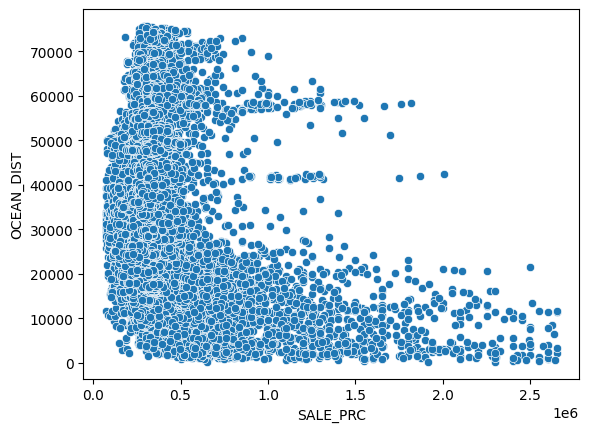

In [4]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="OCEAN_DIST")

<Axes: xlabel='SALE_PRC', ylabel='SPEC_FEAT_VAL'>

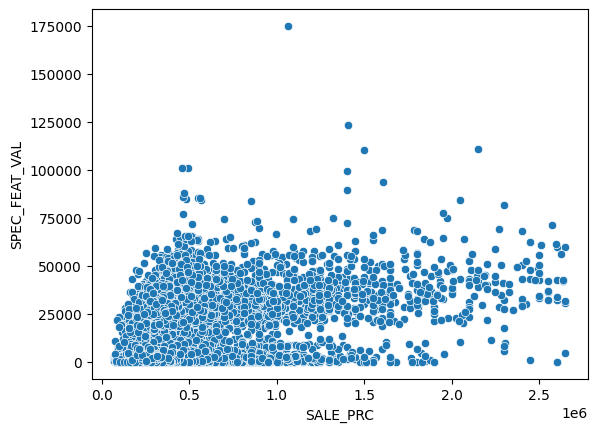

In [5]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="SPEC_FEAT_VAL")

<Axes: xlabel='SALE_PRC', ylabel='LND_SQFOOT'>

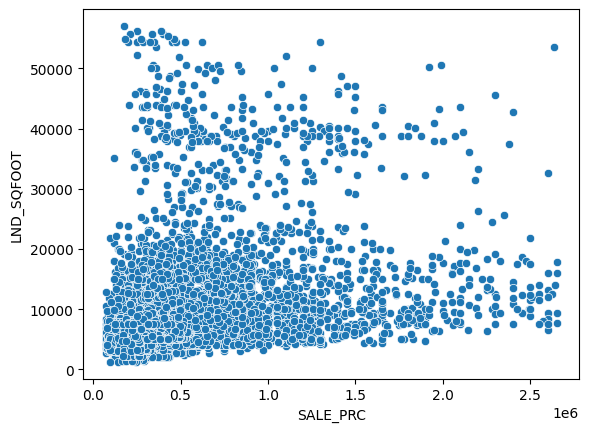

In [6]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="LND_SQFOOT")

<Axes: xlabel='SALE_PRC', ylabel='age'>

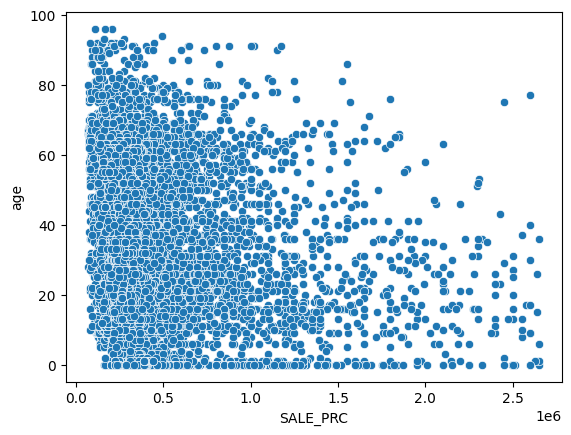

In [7]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="age")

<Axes: xlabel='SALE_PRC', ylabel='structure_quality'>

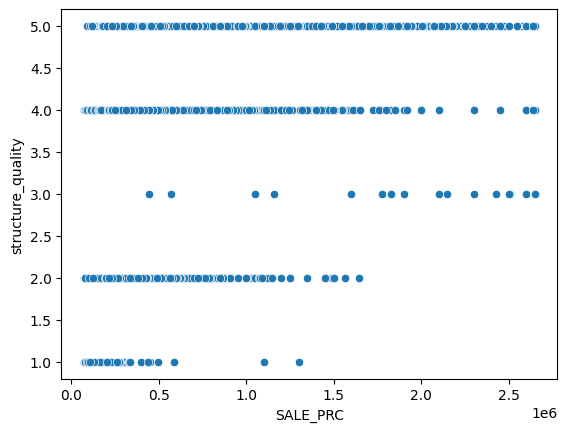

In [8]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="structure_quality")

<Axes: xlabel='SALE_PRC', ylabel='TOT_LVG_AREA'>

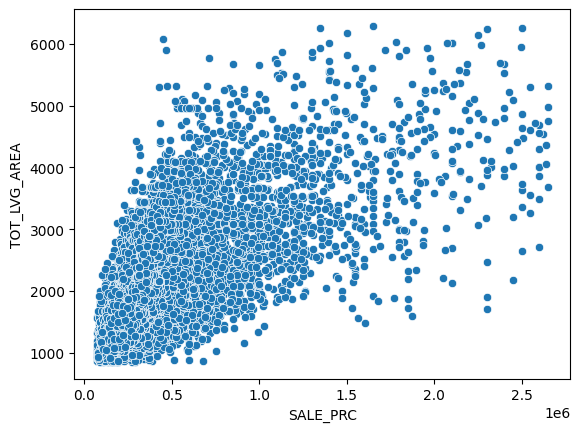

In [9]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="TOT_LVG_AREA")

<Axes: xlabel='SALE_PRC', ylabel='LATITUDE'>

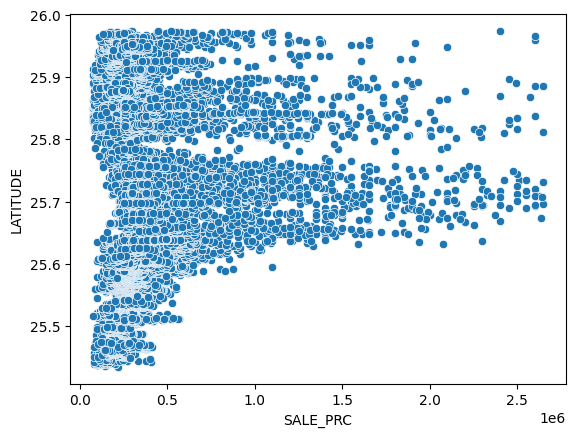

In [10]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="LATITUDE")

<Axes: xlabel='SALE_PRC', ylabel='LONGITUDE'>

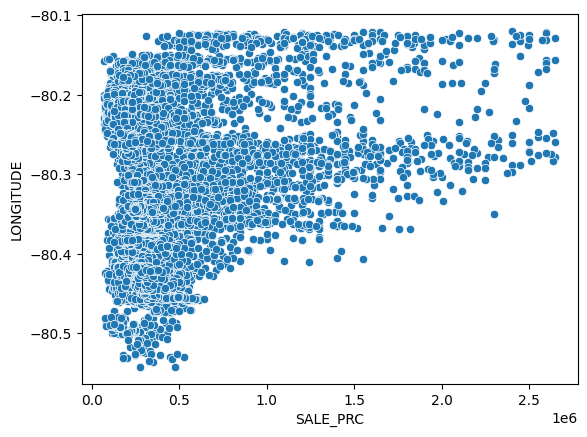

In [11]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="LONGITUDE")

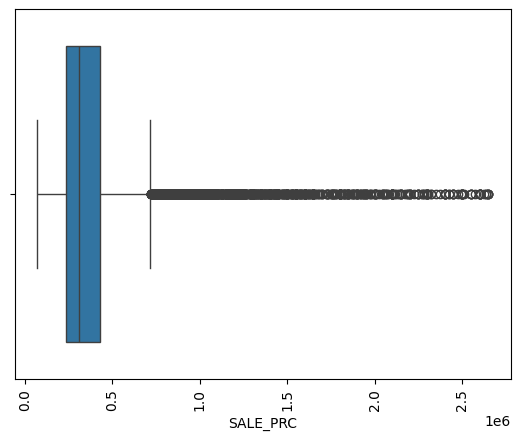

In [12]:
sns.boxplot(data = df ,x = "SALE_PRC")
plt.xticks(rotation = 90);

<Axes: xlabel='SALE_PRC', ylabel='month_sold'>

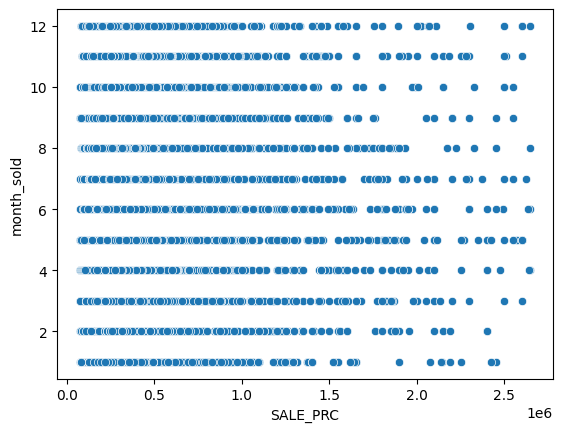

In [13]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="month_sold")

In [14]:
df.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

In [16]:
df.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

In [17]:
df.std()

LATITUDE             1.406333e-01
LONGITUDE            8.919907e-02
PARCELNO             1.199290e+12
SALE_PRC             3.172147e+05
LND_SQFOOT           6.070089e+03
TOT_LVG_AREA         8.135385e+02
SPEC_FEAT_VAL        1.389097e+04
RAIL_DIST            6.178027e+03
OCEAN_DIST           1.759508e+04
WATER_DIST           1.193299e+04
CNTR_DIST            3.200847e+04
SUBCNTR_DI           2.216183e+04
HWY_DIST             6.068936e+03
age                  2.115307e+01
avno60plus           1.212758e-01
month_sold           3.301523e+00
structure_quality    1.097444e+00
dtype: float64

In [18]:
df.corr()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
LATITUDE,1.000000,0.721232,-0.165487,0.047701,-0.077481,-0.193972,-0.007634,-0.172382,0.242735,-0.423396,-0.717348,-0.195823,-0.113443,0.416967,0.081366,-0.023634,0.391989
LONGITUDE,0.721232,1.000000,-0.432816,0.195274,0.018242,-0.181007,-0.009372,-0.303155,-0.457477,-0.764256,-0.791968,-0.380220,-0.216406,0.488757,0.059416,-0.010859,0.132893
PARCELNO,-0.165487,-0.432816,1.000000,-0.204068,0.071381,0.102439,0.055152,0.223387,0.289232,0.295951,0.419933,0.243888,0.018247,-0.270718,-0.160925,0.011129,0.044652
SALE_PRC,0.047701,0.195274,-0.204068,1.000000,0.363077,0.667301,0.497500,-0.077009,-0.274675,-0.127938,-0.271425,-0.370078,0.231877,-0.123408,-0.027026,0.000325,0.383995
LND_SQFOOT,-0.077481,0.018242,0.071381,0.363077,1.000000,0.437472,0.390707,-0.083901,-0.161579,-0.055093,-0.023181,-0.159094,0.130488,0.101244,-0.005899,0.005926,-0.006686
TOT_LVG_AREA,-0.193972,-0.181007,0.102439,0.667301,0.437472,1.000000,0.506064,0.075486,-0.050141,0.148343,0.136526,-0.044882,0.229497,-0.340606,-0.056545,0.002517,0.173422
SPEC_FEAT_VAL,-0.007634,-0.009372,0.055152,0.497500,0.390707,0.506064,1.000000,-0.021965,-0.055155,0.013923,-0.048817,-0.151916,0.153770,-0.098780,-0.008879,-0.014012,0.188030
RAIL_DIST,-0.172382,-0.303155,0.223387,-0.077009,-0.083901,0.075486,-0.021965,1.000000,0.258966,0.162313,0.444494,0.485468,-0.092495,-0.234515,-0.116955,0.010560,-0.074075
OCEAN_DIST,0.242735,-0.457477,0.289232,-0.274675,-0.161579,-0.050141,-0.055155,0.258966,1.000000,0.490764,0.245396,0.425869,0.093500,-0.159409,0.035215,-0.012723,0.209497
WATER_DIST,-0.423396,-0.764256,0.295951,-0.127938,-0.055093,0.148343,0.013923,0.162313,0.490764,1.000000,0.526952,0.195280,0.400233,-0.330578,-0.096339,0.010556,-0.034343


In [19]:
df["laverage"] = df["SALE_PRC"] + df["TOT_LVG_AREA"]
df["SPEC_FEAT_VAL_pre_saleprice"] = df["SALE_PRC"] + df["SPEC_FEAT_VAL"]
df["structure_quality_per_saleprice"] = df["SALE_PRC"] + df["structure_quality"]
df["neg_CNTR_DIST_per_saleprice"] = df["SALE_PRC"] + df["CNTR_DIST"]
df["neg_PARCELNO_per_saleprice"] = df["SALE_PRC"] + df["PARCELNO"]
df["LONGITUDE_per_saleprice"] = df["SALE_PRC"] + df["LONGITUDE"]

In [20]:
df

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,...,age,avno60plus,month_sold,structure_quality,laverage,SPEC_FEAT_VAL_pre_saleprice,structure_quality_per_saleprice,neg_CNTR_DIST_per_saleprice,neg_PARCELNO_per_saleprice,LONGITUDE_per_saleprice
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,...,67,0,8,4,441753.0,440000.0,440004.0,482815.3,6.222805e+11,439919.839439
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,...,63,0,9,4,350715.0,349000.0,349004.0,392504.9,6.222804e+11,348919.846032
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,...,61,0,2,4,802276.0,849206.0,800004.0,843530.4,6.222809e+11,799919.846260
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,...,63,0,9,4,990058.0,998033.0,988004.0,1031797.5,6.222811e+11,987919.847343
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,...,42,0,7,4,756684.0,771681.0,755004.0,798599.7,6.222809e+11,754919.845361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,...,16,0,4,4,275967.0,281580.0,275004.0,297175.9,1.313203e+11,274919.740205
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,...,26,0,5,4,341854.0,342544.0,340004.0,362375.1,1.313204e+11,339919.739646
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,...,16,0,7,4,288771.0,289564.0,287504.0,308466.9,1.313203e+11,287419.743874
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,...,16,0,8,4,316613.0,318136.0,315004.0,336475.6,1.313204e+11,314919.742458


<Axes: xlabel='SALE_PRC', ylabel='laverage'>

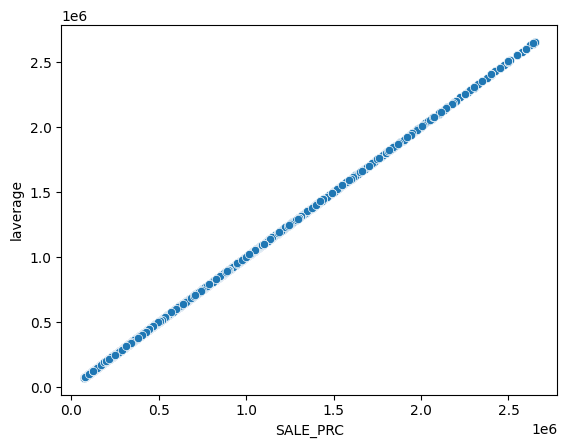

In [21]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="laverage")

<Axes: xlabel='SALE_PRC', ylabel='SPEC_FEAT_VAL_pre_saleprice'>

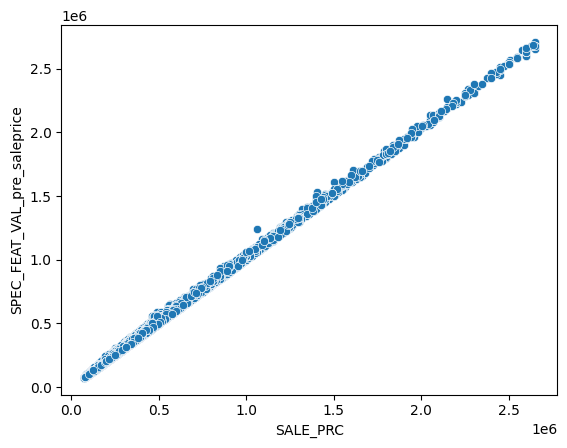

In [22]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="SPEC_FEAT_VAL_pre_saleprice")

<Axes: xlabel='SALE_PRC', ylabel='LONGITUDE_per_saleprice'>

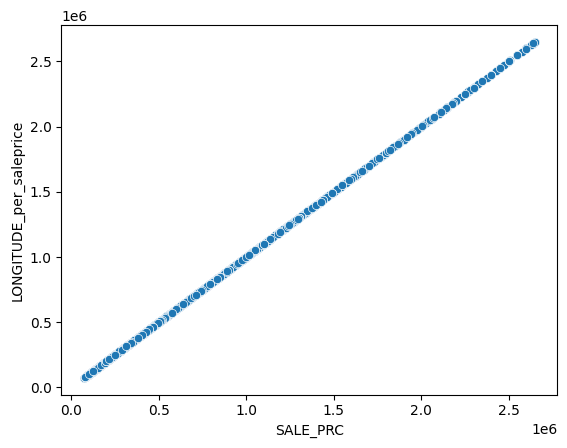

In [23]:
sns.scatterplot(data = df  ,x ="SALE_PRC" ,y="LONGITUDE_per_saleprice")

In [24]:
X = df.drop(["SALE_PRC"], axis = 1).values
print(X.shape)
X.astype(np.float64())

(13932, 22)


array([[ 2.58910306e+01, -8.01605605e+01,  6.22280071e+11, ...,
         4.82815300e+05,  6.22280511e+11,  4.39919839e+05],
       [ 2.58913242e+01, -8.01539675e+01,  6.22280100e+11, ...,
         3.92504900e+05,  6.22280449e+11,  3.48919846e+05],
       [ 2.58913341e+01, -8.01537395e+01,  6.22280100e+11, ...,
         8.43530400e+05,  6.22280900e+11,  7.99919846e+05],
       ...,
       [ 2.57837933e+01, -8.02561255e+01,  1.31320040e+11, ...,
         3.08466900e+05,  1.31320328e+11,  2.87419744e+05],
       [ 2.57840068e+01, -8.02575422e+01,  1.31320040e+11, ...,
         3.36475600e+05,  1.31320355e+11,  3.14919742e+05],
       [ 2.57843871e+01, -8.02589009e+01,  1.31320041e+11, ...,
         2.71928600e+05,  1.31320291e+11,  2.49919741e+05]])

In [25]:
y = df["SALE_PRC"].values.reshape(-1,1)
print(y.shape)
y

(13932, 1)


array([[440000.],
       [349000.],
       [800000.],
       ...,
       [287500.],
       [315000.],
       [250000.]])

In [26]:
le = LabelEncoder()
y = le.fit_transform(y)

g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
fold = KFold(n_splits= 10 , shuffle=True)
for train_idx , test_idx in fold.split(X , y):
    X_train , X_test = X[train_idx] , X[test_idx]
    y_train , y_test = y[train_idx] , y[test_idx]

In [28]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print("Maximalwert von X_train:", X_train.max())
print("Maximalwert von X_test:", X_test.max())
print("Minimalwert von X_train:", X_train.min())
print("nMinimalwert von X_test:", X_test.min())

print("\n")

print("Maximalwert von y_train:", y_train.max())
print("Minimalwert von y_train:", y_train.min())
print("nMaximalwert von y_test:", y_test.max())
print("Minimalwert von y_test:", y_test.min())


Maximalwert von X_train: 1.0000000000000002
Maximalwert von X_test: 1.03277896165942
Minimalwert von X_train: 0.0
nMinimalwert von X_test: -0.000250887064979749


Maximalwert von y_train: 2110
Minimalwert von y_train: 0
nMaximalwert von y_test: 2110
Minimalwert von y_test: 4


In [30]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [31]:
X_train = T.from_numpy(X_train)
X_test = T.from_numpy(X_test)
y_train = T.from_numpy(y_train)
y_test = T.from_numpy(y_test)

In [32]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [33]:
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()

In [34]:
print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)

torch.float32
torch.float32
torch.float32
torch.float32


In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([12539, 22])
torch.Size([1393, 22])
torch.Size([12539])
torch.Size([1393])


In [36]:
X_train.shape

torch.Size([12539, 22])

In [37]:
class House_price_predictions(nn.Module):
    
    def __init__(self, input_dims = 22 , hidden_units = 125 , output_dims = 1):
        super().__init__()
        self.droprate = (0.2)
        self.dropout = nn.Dropout(p = self.droprate)
        self.prob_comp = nn.Softmax(dim = 1)
        self.activation = nn.LeakyReLU()
        
        self.ll1 = nn.Linear(in_features= input_dims , out_features= hidden_units)
        self.ll2 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        
        self.ll3 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        self.ll4 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        
        self.ll5 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        self.ll6 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        
        self.ll7 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        self.ll8 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        
        self.ll9 = nn.Linear(in_features= hidden_units , out_features= hidden_units)
        self.ll10 = nn.Linear(in_features= hidden_units , out_features= output_dims)
        
    def forward(self , X):
        
        X = self.activation(self.ll1(X))
        X = self.activation(self.ll2(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll3(X))
        X = self.activation(self.ll4(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll5(X))
        X = self.activation(self.ll6(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll7(X))
        X = self.activation(self.ll8(X))
        X = self.dropout(X)
        
        X = self.activation(self.ll9(X))
        X = self.activation(self.ll10(X))
        X = self.dropout(X)
        
        X = self.prob_comp(X)
        
        return X
        
class training_and_testing():
    
    
    def __init__(self):
        self.lr = 1e-4 
        self.device = T.device("cuda:0" if T.cuda.is_available() else "cpu")
        self.epochs = 50
        self.loss = nn.MSELoss()
        self.model = House_price_predictions().to(self.device)
        self.criterion = opt.Adam(self.model.parameters() , lr = self.lr)
        
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
        
    def train_loop(self):

        for epochs in range(self.epochs):
            train_acc , test_acc = [] , []

            self.model.train()

            forward_pass = self.model(self.X_train)

            loss_fn = self.loss(forward_pass , self.y_test)
            loss_fn.backward()

            self.criterion.zero_grad()
            self.criterion.step()

            train_acc.append(loss_fn.item())

            self.model.eval()

            with T.inference_mode():
                test_pred = self.model(self.X_train)
                eval_loss = self.loss(test_pred , self.y_test)
                test_acc.append(eval_loss.item())
                print(f"Epoch [{epochs+1}/{self.epochs}], Train Loss: {train_acc} , Eval_loss : {test_acc}")

        plt.plot(range(1 , self.epochs +1 ) , train_acc , label = "Train_Acc" , c = "cyan")
        plt.plot(range(1 , self.epochs +1 ) , eval_loss , label = "Evaluation_Acc" , c = "blue")
        plt.xlabel("Training")
        plt.ylabel("Evalutaion")
        plt.title("Model Performance")
        plt.legend(loc = (1,0))
        plt.show();

    def parameters(self):
        return self.model.state_dict()

    def predict(self):
        pred = self.model(X_test)

        mae = mean_absolute_error(self.y_test.detach().numpy() , pred.detach().numpy())

        mse =mean_squared_error(self.y_test.detach().numpy() , pred.detach().numpy())

        print(f"mean_absolute_error is {mae}")
        print(f"mean_squared_error is {mse}")
        

        

g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
g:\Sonstiges\Programmieren\python\3.10.0\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1393])) that is different to the input size (torch.Size([12539, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [2/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [3/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [4/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [5/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [6/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [7/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [8/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [9/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [10/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [11/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [12/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [13/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [14/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [15/50], Train Loss: [974197.25] , Eval_loss : [974197.25]
Epoch [16/50], Train Loss: [974197

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

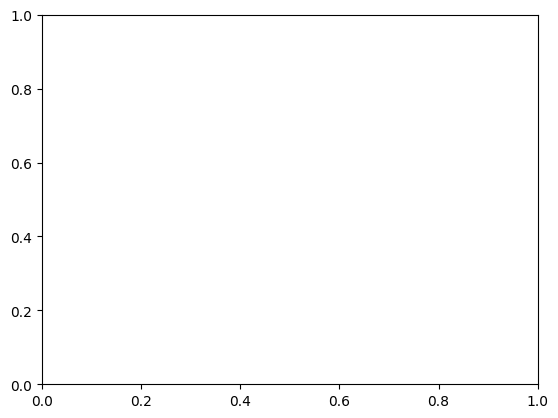

In [38]:
training_and_testing().train_loop()

In [ ]:
training_and_testing().predict()

mean_absolute_error is 832.6697998046875
mean_absolute_error is 958351.1875
